## Importing dataset

In [5]:
import pandas as pd
df = pd.read_csv('/content/kc_house_data.csv')
#kaggle dataset credit > https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Reviewing dataset

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Preparing dataset

In [10]:
df['floors'] = df['floors'].astype('int')
df['price'] = df['price'].astype('int')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Exploratory data analysis: visualization

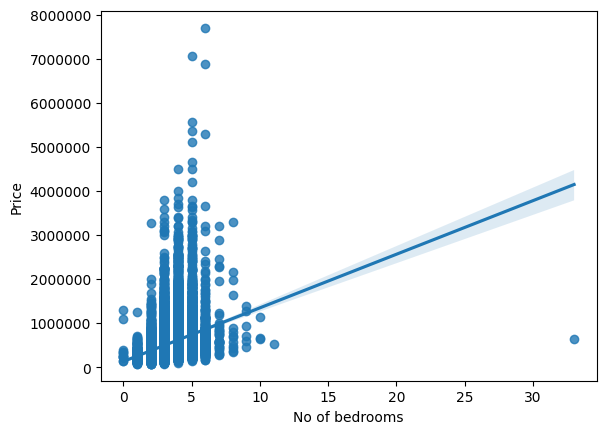

In [11]:
sns.regplot(x='bedrooms', y='price', data=df)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('No of bedrooms')
plt.ylabel('Price')
plt.show()
#It shows a strong positive linear relationship

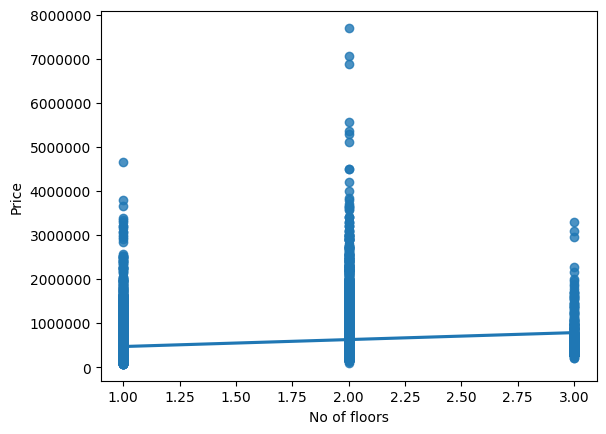

In [12]:
sns.regplot(x='floors', y='price', data=df)
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('No of floors')
plt.ylabel('Price')
plt.show()
#It shows a weak positive correlation

In [13]:
X = df[['yr_renovated', 'bedrooms', 'floors', 'bathrooms', 'sqft_living', 'grade', 'condition', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
Y = df['price']

In [14]:
MLR_1 = LinearRegression()
MLR_1.fit(X, Y)
y_pred = MLR_1.predict(X)

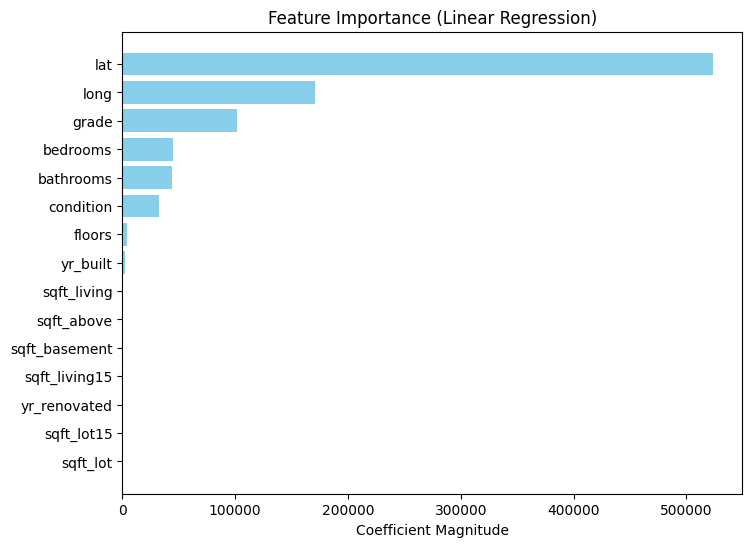

In [15]:
# Get the coefficients (feature importance)
coefficients = MLR_1.coef_
features = X.columns

# Create a DataFrame for the coefficients
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': np.abs(coefficients)  # Use absolute values for importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()  # Invert to show the most important feature at the top
plt.show()

Train the model

In [16]:
X = df[['bedrooms', 'bathrooms', 'lat', 'long', 'grade', 'condition', 'floors', 'yr_built']]
Y = df['price']

In [17]:
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=899)

In [19]:
PolyR = LinearRegression()
PolyR.fit(x_train, y_train)
y_pred = PolyR.predict(x_test)

In-sample evaluation

In [20]:
mse = mean_squared_error(y_test, y_pred)
mse

30962079186.43347

In [21]:
R2_score = PolyR.score(x_test, y_test)
R2_score

0.7740005044455015

Out of sample evaluation

In [22]:
scores = cross_val_score(PolyR, X_poly, Y, cv=3)
print("Cross-Validated Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validated Scores: [0.72232829 0.72659561 0.63001199]
Mean Score: 0.6929786274408006
